In [2]:
#Bank_Service版 import package
import requests
from bs4 import BeautifulSoup
from lxml import etree
import pandas as pd
import re
from urllib.request import urlretrieve
import os
import jieba.posseg as pseg
import jieba.analyse
from snownlp import SnowNLP
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
#內文爬蟲 function
def download(article):
    for tit in article:
        #print(tit.text,tit['href'])


        apple = requests.get('https://www.ptt.cc'+tit['href'])
        pineapple = etree.HTML(apple.text)
        content = pineapple.xpath('//*[@id="main-content"]/text()') #內文，但包含\n       
        try:
            content = pineapple.xpath('//*[@id="main-content"]/text()')[0]
            author = pineapple.xpath('//*[@id="main-content"]/div[1]/span[2]')[0].text #作者
            topic = pineapple.xpath('//*[@id="main-content"]/div[3]/span[2]')[0].text  #主題
            t = pineapple.xpath('//*[@id="main-content"]/div[4]/span[2]')[0].text  #時間

            pine = BeautifulSoup(apple.text,'html.parser')
            push_0 = pine.select('div.push') 
            push=''  #推文內容
            for i in push_0:
                    push+='//'+i.text
        
            a1.append(topic)
            a2.append(author)
            a3.append(t)
            a4.append(content)
            a5.append(push)
        except:
            print(tit.text,tit['href'])

In [48]:
#實際執行爬蟲

web='https://www.ptt.cc/bbs/Bank_Service/index.html' #修改要爬的PTT版別

a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]

for times in range(45):  #此處要爬的選擇頁數
    apple = requests.get(web)
    pineapple = BeautifulSoup(apple.text,'html.parser')
    article = pineapple.select('div.title a')
    last = pineapple.select('div.btn-group-paging a')
    last_web = 'https://www.ptt.cc'+last[1]['href']
    web = last_web
    download(article)

        
aa= {"標題":a1,"作者":a2,"日期時間":a3,"文章內容":a4,"推文":a5}

aa_df=pd.DataFrame(aa, columns=["標題","作者","日期時間","文章內容","推文"])

aa_df.to_excel("C:/Users/Adam/Desktop/output/pttBS.xlsx")

aa_df

Re: [問題]台灣銀行那家分行可以換'新'硬幣~~~?? /bbs/Bank_Service/M.1525317348.A.308.html
活期存款 /bbs/Bank_Service/M.1521088010.A.DB3.html


,標題,作者,日期時間,文章內容,推文
0,[情報] 台灣企銀IOS更新 新增快速登入,xJIAJIAx (Jia_Jia),Sat Jul 14 00:15:09 2018,\n為了工作而辦的帳戶\n今日更新終於支援指紋登入跟圖形密碼了\n\n終於不用那麼麻煩每次帳...,//→ xJIAJIAx: 抱歉我火星了，看到樓下有人發文... 07/14 00:19\n...
1,[情報] 王道暫停服務(預計到09:30),VenQoo (WWW),Sat Jul 14 02:47:58 2018,\n\n消息來源：\n\n,//推 taeyang5566: 感謝..剛剛在挪威晚上七點(台灣時間已進入公告的維 07/...
2,[問題] 中信app繳費相關問題,aMiss (aMiss),Sat Jul 14 05:52:01 2018,\n請問大家\n,//推 hkahka: 帳戶扣款呦07/14 06:10\n//推 blackonefour...
3,[問題] 利息低於1k仍會申報所得稅的銀行,cp296633 (Joey),Sat Jul 14 21:00:39 2018,\n徵求全年度利息低於1000仍然會列單申報國稅局\n也就是存款人所得稅申報時會列出該項利息...,//推 aq2272353712: 台新吧，什麼鬼錢都會收到扣憑 07/14 21:46\n...
4,Fw: [閒聊] KOKO開戶流程,cailinzan (深深深呼吸),Sat Jul 14 22:18:55 2018,\n,//推 bunnyer: 有填推薦碼，但沒收到回饋 07/14 22:12\n//→ cai...
5,[問題] 打不通的花旗理專/分行 該如何是好？,CCMC (CCM),Sun Jul 15 12:41:43 2018,\n\n先生有一個十幾年沒動過的花旗財富管理帳戶\n\n最近因為把戶頭的美金移到渣打優存，變...,//→ O12: 外商銀營業時間外沒人接很正常07/15 12:44\n//→ O12: 上...
6,Re: [情報] 渣打台幣活存168新台幣活期性存款專案,Yaiba (緋心刀刃),Sun Jul 15 17:22:29 2018,\n,//推 kiloga: 謝謝提醒 07/15 17:41\n//→ alex1973: 從以...
7,[問題] 台新Richart的帳戶餘額怪怪的,silvia813 (王小星),Sun Jul 15 20:24:15 2018,\n不知道有沒有人跟我一樣\n今天登入Richart網銀發現帳戶餘額很奇怪\n,//推 qxxrbull: 你去提款機提看看有沒有辦法提到超過阿 07/15 20:30\n...
8,[情報] 8月底前富邦金融卡在富邦高鐵ATM轉帳免費,TZUYIC (Celine LoveMeBackToLife),Mon Jul 16 13:16:20 2018,\nRef.,//推 hkahka: 直接用lucky pay轉也不用錢 07/16 13:26\n//推...
9,[問題] 京城開戶都要很久嗎?!,PaganTsai (培根),Mon Jul 16 14:14:51 2018,\n剛去京城開戶，等了十幾分鐘後說\n我的名字跟某知名政治人物一樣，\n所以可能還需要再30...,//→ Go2: 開戶除了看聯徵之外，應該還會去查判決資料(犯罪紀錄？)，估 07/16 1...


In [49]:
 #讀取爬下的檔案

MD=pd.read_excel("C:/Users/Adam/Desktop/output/pttBS.xlsx") 

In [50]:
ss=MD[MD['標題'].str.contains('玉山',regex=True)|MD['標題'].str.contains('高山',regex=True)]

ss


,標題,作者,日期時間,文章內容,推文
15,[討論] 玉山銀行無預警取消新富理財會員資格,top911 (聖誕),Tue Jul 17 17:29:03 2018,\n\nRef:近日家人轉帳。發現多收了15元。而且連續收了很多次。但是看ㄧ下資產總額是4佰...,"//→ alex1973: 不爽就轉走, 不要嘴巴講講, 結果都不做. 打字可以好好打 07..."
29,[心得] 玉山開戶,txreformer (txreformer),Wed Jul 11 21:17:26 2018,\n前日線上填預約開戶\n翌日早朝前往分行\n門可羅雀\n\n大廳新進正妹行員詢問來由。\n...,//噓 lianpig5566: 說白話文 07/11 21:18\n//推 jasome:...
36,[心得] 今天去玉山開戶,bajiqa (多爾),Fri Jul 13 13:54:30 2018,\n我終於去玉山開戶了。\n\n還滿順利的，有先問要帶的證件還有為什麼開戶，然後就抽號碼。\...,//噓 docsis: 奇怪 買淘寶一定要寄到家裡嗎....？ 07/13 17:48\n/...
38,[心得] 玉山開戶,dd410504 (吾皇萬歲),Fri Jul 13 14:20:21 2018,"\n看了板上這麼多人的開戶心得,知道現在玉山越來越難開戶\n\n不過因為paypel有錢想轉...","//→ wtfconk: 後續你就知道了,轉帳個兩三次就會TV照會你是不是洗錢~~ 07/1..."
62,[問題] 去玉山換燃料稅退稅支票錢沒進來,zxc2331189 (阿拉花瓜),Mon Jul 2 16:18:42 2018,\n如題\n\n是這樣的啦\n上禮拜6/28禮拜四\n我拿燃料稅退稅支票去玉山銀行換\n行員...,//推 chihchingho: 交換票要確認沒退票，因此隔天才能動用 07/02 16:3...
117,[心得] 高山 近期有開其他銀行 開戶心得,ntumars (mars),Sat Jun 30 03:57:26 2018,\n\n其實本來就有打算開高山外幣\n看上他的優勢匯率\n本來想說等九月，聯徵上的資料都消失...,//推 ilovejesus: 推分享06/30 04:39\n//推 nttra: 財力解...
154,[心得] 玉山開戶心得,alucky12 (小帥),Sat Jun 23 14:59:14 2018,\n因為工作需求到玉山開戶\n前一天在網路上填了預約開戶\n隔天只帶著證件去玉山\n（網路填...,//推 bassblacktea: 所以玉山到底能不能預約XD 前面有文章說不行 06/23...
172,[問題] 玉山銀行 網路預約開戶是否無效？,ting2498 (小江),Thu Jun 21 14:18:54 2018,\n\n\n以下代轉朋友經驗，雖然我覺得她是被誆了？\n\n\n朋友因為新工作需求要去開玉山...,//→ a1412762347: 我開戶是現場請我電腦填預約，那時櫃臺還有人在辦 06/21...
333,[新聞] 玉山銀行刷臉提款ATM 憑一張臉就能領錢,cute320518 (cute320518),Tue May 22 19:25:16 2018,\n玉山銀行刷臉提款ATM 憑一張臉就能領錢\n\n2018-05-22 16:32經濟日報...,//→ zero11995: ATM那麼少 不實用05/22 19:42\n//→ horu...
342,Re: [心得] 玉山開戶,bbscev (bbscev),Wed May 16 22:10:29 2018,\n,//推 asxc530530: 洗錢防制內化到DNA 05/16 22:43\n//推 as...


In [51]:
jieba.set_dictionary('C:\\Users\\Adam\\Desktop\\help\\dict.txt.big.txt')   #繁體字典
jieba.analyse.set_stop_words("C:\\Users\\Adam\\Desktop\\help\\stop_words.txt")  #設定停止詞(可進去修改)
jieba.load_userdict("C:\\Users\\Adam\\Desktop\\help\\userdict.txt")  #使用者補充字典(可進去修改)

df=ss['文章內容']
allcontent=''.join(df)  #把所有文章內容併起來
new=re.sub("\d|[\s+\.\!\/_,$%^*(+\"\']+|[+-—！，。？、~@#￥%……&*()（）:]+",'',allcontent) #去除標點符號

worde = jieba.cut(new,cut_all=False)
your_word=worde
cc=' '.join(worde)  #以空格分隔段好的文字
cc


Building prefix dict from C:\Users\Adam\Desktop\help\dict.txt.big.txt ...
Loading model from cache C:\Users\Adam\AppData\Local\Temp\jieba.u2a5ff907f0989b23cd0cb4eed1d5c332.cache
Loading model cost 1.424 seconds.
Prefix dict has been built succesfully.


'近日 家人 轉帳 發現 多收 了 元 而且 連續 收 了 很 多次 但是 看 ㄧ 下 資產 總額 是 佰 多萬 而 新富 理財 是佰萬 以上 打去問 客服 客服 推给 原開户 分行 的 理 専 理專 推给 經理 經理 回文 説 你 没 買 基金 或 仍 在 商議 會員 資格 有人 今年 也 遭受 其害 ㄧ 次元次 就 損失 元 記得 台新放個 ㄧ 萬 每月 也 有次 轉帳 優惠 怎 麽 會 放 了 佰 多萬 存款 的 玉山 ㄧ 次 也 没給 真是 可 悪 的 制度 啊 誰 能 幫忙 解惑 啊 不 才 小弟 筆 前日 線上 填 預約 開戶 翌日 早朝 前往 分行 門可羅雀 大廳 新進 正妹 行員 詢問 來 由 答之線 上 預約 開戶 對 曰 線 上 預約 系統 異常 不能 使用 ； 再者 戶籍 不在 此不給 開答 之 為 事 地點 近欲開 帳戶 與 辦 信用卡 對 曰 玉山 管理 甚嚴 是 日 未必 可開 伊賜 號碼牌 予 敝 人 等候 嘗試 不及 敝 人 坐 暖 刻鐘 櫃檯 輒 叫號 開戶 流程 暢通 ： 半 強迫 同時 併 開立 証券 戶 暨 複 委託 與 外幣 帳戶 台幣 帳戶 存 外幣 不用 存填妥 玉山 世界 卡 申請書 設定 約定 帳戶 理專 証券 業務 也 前來 說明 計四人 熱切 服務 榮幸 不勝 惶恐 前後 不及 半 時辰 速度 拔尖 大略 僅次於 台新略贏 題海 無涯 理論 是 岸 物理 是 一種 感覺 數學 是 一種 思想 我 終於 去 玉山 開戶 了 還滿 順利 的 有 先 問要 帶 的 證件 還有 為 什麼 開戶 然後 就 抽 號碼 只是 有個 問題 我 跟 她們 說 淘寶 購物 要 用櫃 臺 告訴 我 需要 察看 我 淘寶 帳戶 的 住址 是否 一致 因為 在 外面 沒 網路 櫃 臺 說 只要 把 畫面 擷取 出來 給他 看 就 可以 於是 我 又 回家 截圖 之後 再 回去 開戶 就 一切 很 順利 到 結束 等 一個 禮拜 後 再 去 拿 卡片 今天 只有 開 網路 銀行 希望 大家 開戶 順利 看 了 板 上 這麼 多人 的 開戶 心得 知道 現在 玉山 越來越 難 開戶 不過 因為 有錢 想轉 出來 還是 硬著 頭皮 去 開 了 先 說 我 是 在 中壢 的 中山 分行 開戶 的 基本上 這間 生意 應該 是 中壢 區 最好 的 

In [52]:
#去除停止詞
with open("C:\\Users\\Adam\\Desktop\\help\\stop_words_ptt.txt",encoding="utf-8") as f:  #為了ptt設的停止詞
    stopwords = f.readlines() 
stop_words = [x.strip() for x in stopwords] #strip: 移除頭尾空格、中間不會，把停止詞的/n砍掉

#已經斷詞好的語料 
words_filtered = ' '.join([word.strip() for word in cc.split(' ') if word not in stop_words]) 



In [53]:
ww=jieba.analyse.extract_tags(new,10)  #找前十大出現
print('/'.join(ww))


開戶/玉山/銀行/帳戶/行員/然後/外幣/因為/預約/之後


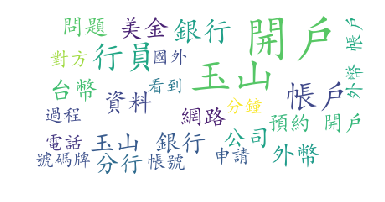

In [54]:
#畫文字雲

#黑色背景
#wc=WordCloud(font_path="C:\\Users\\Adam\\Desktop\\help\\simkai.ttf") #中文字型的路徑
#cloudimg=wc.generate(words_filtered)
#plt.imshow(cloudimg)
#plt.axis("off")
#plt.show()


#以下為白色背景

wc2=WordCloud(font_path="C:\\Users\\Adam\\Desktop\\help\\simkai.ttf",
              #背景色
             background_color="white",
              #最大詞彙數
             max_words=25,
             relative_scaling=.5,
              #最大號字體
             max_font_size=60,
             random_state=42)

cloudimg2=wc2.generate(words_filtered)
# cloudimg2.to_file("pjl_cloud4.jpg") #保存圖片

plt.figure
plt.imshow(cloudimg2)
plt.axis("off")
plt.show()

In [55]:
push=ss['推文']
senti=[]
for i in push:
    n=i.split('//')
    for j in n:
        try:
            d=re.sub('\s|[A-Za-z]|:|\d|/','',j)
            s = SnowNLP(d)
            w=SnowNLP(s.han)
            print(d)
            print(w.sentiments)
            n=(d,w.sentiments)
            senti.append(n)
        except:
            print("壞掉")

壞掉
→不爽就轉走,不要嘴巴講講,結果都不做.打字可以好好打
0.28999910692511366
→標點符號正確使用嗎?每次看你文章就很難過
0.9066375377631045
→照規矩走囉，理財帳戶字面很清楚，不爽快轉走
0.9863052779382785
壞掉
噓說白話文
0.6041193694627294
推諷刺滿分
0.8577198634227491
推質好文
0.7315135177276716
→如果說要辦雙幣卡開戶被打槍的機率高嗎?
0.04652909623074841
推不難懂啊
0.6036905857208933
推去年也去高山開戶評價差不多也是半小時內完成-
0.09850865870276304
→
0.5
推全部業務都給你洗過一遍了
0.20574077603239826
推
0.36842105263157865
推看到複委託這個價格，唉，沒辦法更有競爭力嗎？
0.16781443866244328
→到底是證券業將客戶宰還是根本沒能力向上手議價？
0.18990245208674217
→時光機來著？
0.8519578032811286
推有趣推
0.5016697525244596
→看到世界卡跟理專大概是直接開財管戶了吧
0.652930030714423
噓看了三行就想噓
0.4917814607490165
推甚是有趣。實則台灣語文教育令吾輩對文言具備閱讀能力
0.9992449553880101
推噫！辦妥也
0.180250654857941
推說人話！哈！
0.23243331273341883
推誠彼娘之非悅
0.44767845850986676
推這篇滿不錯的
0.7669333013131491
推止兀體有創意給推
0.8362829599107264
→關鍵詞世界卡
0.9253101296408127
推半強迫是指你不辦他就不給你過是嗎
0.017754179734712605
噓公啥小啦
0.6634268187834833
推甚好甚好
0.5704420275986981
噓閱下去
0.5
推電波文有趣
0.91838321329554
推看的頭好痛
0.7173856413256158
推汝言甚澀且艱，方不知意之所指
0.07492468771081418
推你好厲害！
0.2313372

0.008032167874903351
→沒餘額本來就不行等錢進來再去開就會過了
0.00516883727489359
→我幾乎都用來淘寶
0.848850839258266
→久久一次幾百元的交易
0.1186462264023952
→玉山有打來問是不是本人使用
0.17264917852972894
推目前我都用來領，台幣活存入帳之後就用街口吸出來，到
0.08164180897145024
→目前都，也有可能外幣還有幾百塊的關係。
0.2253171621232295
→我只有聽到起息要而已
0.3402411713419393
推先去開玉山證券，再去開銀行戶頭
0.02319524204189949
推餘額沒差吧我玉山薪轉戶錢進來都轉去高利活存帳戶
0.005219493827439359
→有時候是行員唬爛你而已可能內部數字會不好看
0.5211418493514016
→然後這篇文章前面板友跟你講的餘額都是指帳戶的
0.6532063673539794
→你卻一直以為是玉山帳號雞同鴨講...
0.09593902952531541
推我覺得有沒有餘額根本是藉口阿...我要收款當然是要
0.08192997375526356
→確定能不能收到款(開戶)再跟客戶答應阿
0.01581799634921144
推那個狀況是開戶後就領掉我也有看過類似的說要放一周
0.056514848348869995
→但是我開薪轉戶後三天就把錢領出來也沒事現在帳戶裡也只
0.038216252776278825
→剩一百塊然後你貼的那篇不就有告訴你解法怕的話就是留
0.2905464699814104
→一千在帳戶裡如果你覺得這樣會留太多.......
0.18152057651981868
推等裡面要提領再去開一次就一定能開了
0.07605242306770787
壞掉
推我也正想問問客服吧
0.04904726752221167
→之前是換了多港幣一筆收
0.29935138311953036
→啊看錯了旅支不太清楚
0.427209199965946
推是吧那你有沒順便問用不完換回手續費多少錢？
0.00038804920284085664
→現在是什麼地方還要用旅行支票？好奇問
0.32089674549801417
推應該沒什麼店家認得旅行支票我是想在旅支

In [56]:
sorted(senti, key=lambda x:x[1])  

[('推薪轉戶不給開給別家銀行帳號也能入帳但每次會扣手續費', 2.7596595010614955e-05),
 ('→預借現金手續費=借款*%+元，這%一次收不是年利率喔', 2.9963358665119344e-05),
 ('→有信用卡才能預借現金，預借現金又能滾循環利率，賺翻了', 5.533188093520547e-05),
 ('推上個月去也是說沒這服務了，需要抽號碼牌，重填資料喔', 0.00020321961417946177),
 ('→抱歉我以為銀行客服假日休息（僅信用卡客服才有）之前', 0.00021378083798007097),
 ('→，卻只能臨櫃刷褶；玉山、渣打遇過補褶機死當無法刷讀；台', 0.00021501709907667532),
 ('推是吧那你有沒順便問用不完換回手續費多少錢？', 0.00038804920284085664),
 ('→之前預約填了一堆資料，現場還用給的取了一張號碼牌，結', 0.0003907923177712824),
 ('→我開玉山也說要審核可是後來也沒接到電話一週後自己', 0.00042444658014906267),
 ('→理專應該是分行指定申請也是經由他提出不需打客服吧', 0.0006303565129189836),
 ('推我玉山外幣存摺也第一次補摺就消磁無言才開戶天.', 0.0007951633257559099),
 ('推交換票要確認沒退票，因此隔天才能動用', 0.00115616574732047),
 ('推櫃檯小姐唬你我三個月內連辦兩張信用卡+兩個戶頭櫃檯', 0.0014859446236021867),
 ('推我昨天開戶只說打算買外幣跟搬雙幣卡就讓我開了，而且是', 0.0015307314868122646),
 ('→總行客服投訴一下，請主管加強行員做事嚴謹與專業度', 0.001549665836628522),
 ('推我之前也是舊帳戶更新，請假跑了一趟某半公營銀行，服務', 0.0015658366807104196),
 ('推是，我也在場等了一個小時（刷機器還有吐號碼牌', 0.0015917666125828678),
 ('→行員的意思總結是好像他們只收元費用太少，總公司不給開', 0.0016206280140941276),

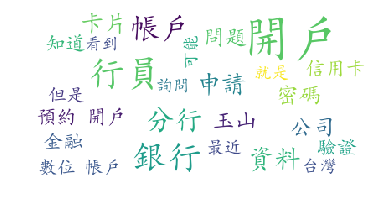

In [57]:
#有關「開戶」貼文的結果

account=MD[MD['標題'].str.contains('開戶',regex=True)]

acc=account['文章內容']
merge=''.join(acc)  #把所有文章內容併起來
new_2=re.sub("\d|[\s+\.\!\/_,$%^*(+\"\']+|[+-—！，。？、~@#￥%……&*()（）:]+",'',merge) #去除標點符號

worde_2 = jieba.cut(new_2,cut_all=False)
your_word_2=worde_2
cc_2=' '.join(worde_2)  #以空格分隔段好的文字

with open("C:\\Users\\Adam\\Desktop\\help\\stop_words_ptt.txt",encoding="utf-8") as f:  #為了ptt設的停止詞
    stopwords = f.readlines() 
stop_words = [x.strip() for x in stopwords] #strip: 移除頭尾空格、中間不會，把停止詞的/n砍掉

#已經斷詞好的語料 
words_filtered_2 = ' '.join([word.strip() for word in cc_2.split(' ') if word not in stop_words]) 

wc2=WordCloud(font_path="C:\\Users\\Adam\\Desktop\\help\\simkai.ttf",
              #背景色
             background_color="white",
              #最大詞彙數
             max_words=25,
             relative_scaling=.5,
              #最大號字體
             max_font_size=60,
             random_state=42)

cloudimg3=wc2.generate(words_filtered_2)
# cloudimg2.to_file("pjl_cloud4.jpg") #保存圖片

plt.figure
plt.imshow(cloudimg3)
plt.axis("off")
plt.show()

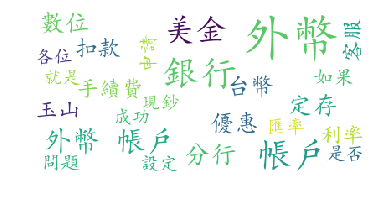

In [58]:
#有關「美金」貼文的結果

account=MD[MD['標題'].str.contains('外幣',regex=True)]

acc=account['文章內容']
merge=''.join(acc)  #把所有文章內容併起來
new_2=re.sub("\d|[\s+\.\!\/_,$%^*(+\"\']+|[+-—！，。？、~@#￥%……&*()（）:]+",'',merge) #去除標點符號

worde_2 = jieba.cut(new_2,cut_all=False)
your_word_2=worde_2
cc_2=' '.join(worde_2)  #以空格分隔段好的文字

with open("C:\\Users\\Adam\\Desktop\\help\\stop_words_ptt.txt",encoding="utf-8") as f:  #為了ptt設的停止詞
    stopwords = f.readlines() 
stop_words = [x.strip() for x in stopwords] #strip: 移除頭尾空格、中間不會，把停止詞的/n砍掉

#已經斷詞好的語料 
words_filtered_2 = ' '.join([word.strip() for word in cc_2.split(' ') if word not in stop_words]) 

wc2=WordCloud(font_path="C:\\Users\\Adam\\Desktop\\help\\simkai.ttf",
              #背景色
             background_color="white",
              #最大詞彙數
             max_words=25,
             relative_scaling=.5,
              #最大號字體
             max_font_size=60,
             random_state=42)

cloudimg3=wc2.generate(words_filtered_2)
# cloudimg2.to_file("pjl_cloud4.jpg") #保存圖片

plt.figure
plt.imshow(cloudimg3)
plt.axis("off")
plt.show()

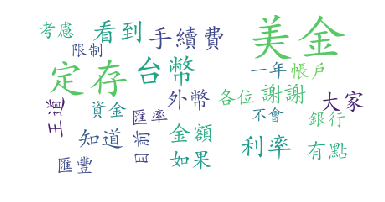

In [59]:
#有關「美金」貼文的結果

account=MD[MD['標題'].str.contains('美金',regex=True)]

acc=account['文章內容']
merge=''.join(acc)  #把所有文章內容併起來
new_2=re.sub("\d|[\s+\.\!\/_,$%^*(+\"\']+|[+-—！，。？、~@#￥%……&*()（）:]+",'',merge) #去除標點符號

worde_2 = jieba.cut(new_2,cut_all=False)
your_word_2=worde_2
cc_2=' '.join(worde_2)  #以空格分隔段好的文字

with open("C:\\Users\\Adam\\Desktop\\help\\stop_words_ptt.txt",encoding="utf-8") as f:  #為了ptt設的停止詞
    stopwords = f.readlines() 
stop_words = [x.strip() for x in stopwords] #strip: 移除頭尾空格、中間不會，把停止詞的/n砍掉

#已經斷詞好的語料 
words_filtered_2 = ' '.join([word.strip() for word in cc_2.split(' ') if word not in stop_words]) 

wc2=WordCloud(font_path="C:\\Users\\Adam\\Desktop\\help\\simkai.ttf",
              #背景色
             background_color="white",
              #最大詞彙數
             max_words=25,
             relative_scaling=.5,
              #最大號字體
             max_font_size=60,
             random_state=42)

cloudimg3=wc2.generate(words_filtered_2)
# cloudimg2.to_file("pjl_cloud4.jpg") #保存圖片

plt.figure
plt.imshow(cloudimg3)
plt.axis("off")
plt.show()

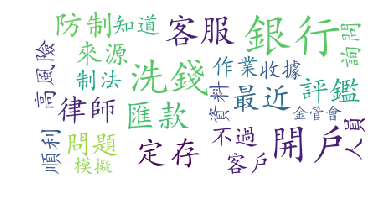

In [60]:
#有關「洗錢」貼文的結果

account=MD[MD['標題'].str.contains('洗錢',regex=True)]

acc=account['文章內容']
merge=''.join(acc)  #把所有文章內容併起來
new_2=re.sub("\d|[\s+\.\!\/_,$%^*(+\"\']+|[+-—！，。？、~@#￥%……&*()（）:]+",'',merge) #去除標點符號

worde_2 = jieba.cut(new_2,cut_all=False)
your_word_2=worde_2
cc_2=' '.join(worde_2)  #以空格分隔段好的文字

with open("C:\\Users\\Adam\\Desktop\\help\\stop_words_ptt.txt",encoding="utf-8") as f:  #為了ptt設的停止詞
    stopwords = f.readlines() 
stop_words = [x.strip() for x in stopwords] #strip: 移除頭尾空格、中間不會，把停止詞的/n砍掉

#已經斷詞好的語料 
words_filtered_2 = ' '.join([word.strip() for word in cc_2.split(' ') if word not in stop_words]) 

wc2=WordCloud(font_path="C:\\Users\\Adam\\Desktop\\help\\simkai.ttf",
              #背景色
             background_color="white",
              #最大詞彙數
             max_words=25,
             relative_scaling=.5,
              #最大號字體
             max_font_size=60,
             random_state=42)

cloudimg3=wc2.generate(words_filtered_2)
# cloudimg2.to_file("pjl_cloud4.jpg") #保存圖片

plt.figure
plt.imshow(cloudimg3)
plt.axis("off")
plt.show()